In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

In [12]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [13]:
median_badroom = math.floor(df.bedrooms.median())
median_badroom
# df.bedrooms.median()

4

In [14]:
df.bedrooms = df.bedrooms.fillna(median_badroom)

In [15]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [16]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [17]:
reg.intercept_

221323.00186540408

In [18]:
reg.predict([[3000,3,40]])

array([498408.25158031])

In [19]:
112.06244194*3000+23388.88007794*3+(-3231.71790863*40)+221323.00186540408

498408.2515740241

In [20]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [21]:
from word2number import w2n
df.experience = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [22]:
df.experience = df.experience.apply(w2n.word_to_num)

In [23]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [24]:
median_value = math.floor(df[['test_score(out of 10)']].mean())
median_value
df[['test_score(out of 10)']] = df[['test_score(out of 10)']].fillna(median_value)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [25]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df[['salary($)']])

LinearRegression()

In [26]:
reg.predict([[12,10,10]])

array([[93747.79628651]])

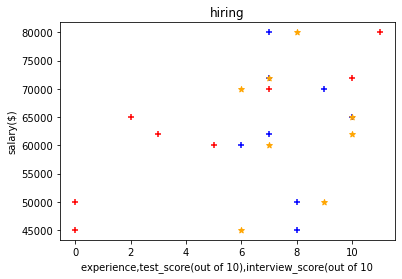

In [27]:
plt.title('hiring')
plt.xlabel('experience,test_score(out of 10),interview_score(out of 10')
plt.ylabel('salary($)')
plt.scatter(df[['experience']],df[['salary($)']],color='red',marker='+')
plt.scatter(df[['test_score(out of 10)']],df[['salary($)']],color='blue',marker='+')
plt.scatter(df[['interview_score(out of 10)']],df[['salary($)']],color='orange',marker='*')
# plt.plot(df[['salary($)']],reg.predict(df[['salary($)']]),color='blue')